In [ ]:
!pip install google-generativeai

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•','*')
  return Markdown(textwrap.indent(text,'> ',predicate=lambda _: True))

In [ ]:
#used to securely store your API key
from google.colab import userdata

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
# List of models
for model in genai.list_models():
  if 'generateContent' in model.supported_generation_methods:
    print(model.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-exp-1206
models/gemini-exp-1121
models/gemini-exp-1114
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


In [ ]:
model = genai.GenerativeModel('gemini-pro')


In [ ]:
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 140 ms, sys: 14.7 ms, total: 154 ms
Wall time: 8.98 s


In [ ]:
response.text

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The meaning of life is a topic that has been pondered by philosophers, religious leaders, and individuals throughout history, and there is no single definitive answer that satisfies everyone. However, there are several common themes and perspectives on the subject:\n\n1. **Personal Fulfillment and Happiness:** Many people believe that the meaning of life lies in finding personal satisfaction and happiness. This can involve pursuing passions, interests, and activities that bring joy and meaning to one's life.\n\n2. **Contribution and Service:** Others find meaning in contributing to the lives of others, making a positive impact on the world, or leaving a legacy. This can involve volunteering, helping those in need, or working towards social or environmental c

In [ ]:
model = genai.GenerativeModel('models/gemini-1.5-flash-latest')

In [ ]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash-latest',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 97.2 ms, sys: 11.9 ms, total: 109 ms
Wall time: 5.33 s


In [ ]:
response.text

"There's no single, universally accepted answer to the meaning of life.  It's a question that has been pondered by philosophers, theologians, and individuals for centuries.  The meaning of life is often considered to be a deeply personal and subjective matter.\n\nDifferent perspectives include:\n\n* **Nihilism:**  The belief that life is inherently without meaning or purpose.\n* **Existentialism:**  The belief that individuals create their own meaning and purpose through their choices and actions.\n* **Absurdism:**  The belief that the search for meaning in a meaningless universe is inherently absurd, but that this absurdity should be embraced.\n* **Hedonism:**  The belief that pleasure and happiness are the ultimate goals in life.\n* **Spiritual and Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, and achieving enlightenment or salvation.\n* **Humanism:**  Focuses on human values, reason

In [ ]:
model = genai.GenerativeModel('models/gemini-2.0-flash-thinking-exp-1219')

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 246 ms, sys: 21.3 ms, total: 268 ms
Wall time: 15.7 s


In [ ]:
response.text

'My thinking process for answering the question "What is the meaning of life?" goes like this:\n\n1. **Acknowledge the Unanswerable (But Still Important) Nature of the Question:**  The first and most crucial step is to recognize that there isn\'t a single, universally agreed-upon answer. Stating this upfront manages expectations and sets the stage for a nuanced discussion. Phrases like "This is one of the biggest, most debated questions" or "There isn\'t a single, definitive answer" are essential.\n\n2. **Categorize Existing Perspectives:** To provide a comprehensive overview, I need to categorize the different ways people approach this question. I think broadly about the sources of meaning:\n    * **Intrinsic/Inherent:**  Is there a pre-ordained purpose? (Religious/Spiritual)\n    * **Human-Created/Subjective:**  Do we define our own purpose? (Philosophical/Personal)\n    * **External Focus:**  Is the meaning found in something outside ourselves? (Relationships, contribution)\n    * *

In [ ]:
response.prompt_feedback

In [ ]:
for chunk in response:
  print(chunk.text)
  print('_'*80)

My thinking process for answering the question "What is the meaning of life?" goes like this:

1. **Acknowledge the Unanswerable (But Still Important) Nature of the Question:**  The first and most crucial step is to recognize that there isn't a single, universally agreed-upon answer. Stating this upfront manages expectations and sets the stage for a nuanced discussion. Phrases like "This is one of the biggest, most debated questions" or "There isn't a single, definitive answer" are essential.

2. **Categorize Existing Perspectives:** To provide a comprehensive overview, I need to categorize the different ways people approach this question. I think broadly about the sources of meaning:
    * **Intrinsic/Inherent:**  Is there a pre-ordained purpose? (Religious/Spiritual)
    * **Human-Created/Subjective:**  Do we define our own purpose? (Philosophical/Personal)
    * **External Focus:**  Is the meaning found in something outside ourselves? (Relationships, contribution)
    * **Internal F

In [ ]:
# Working with Images
!pip install  Pillow

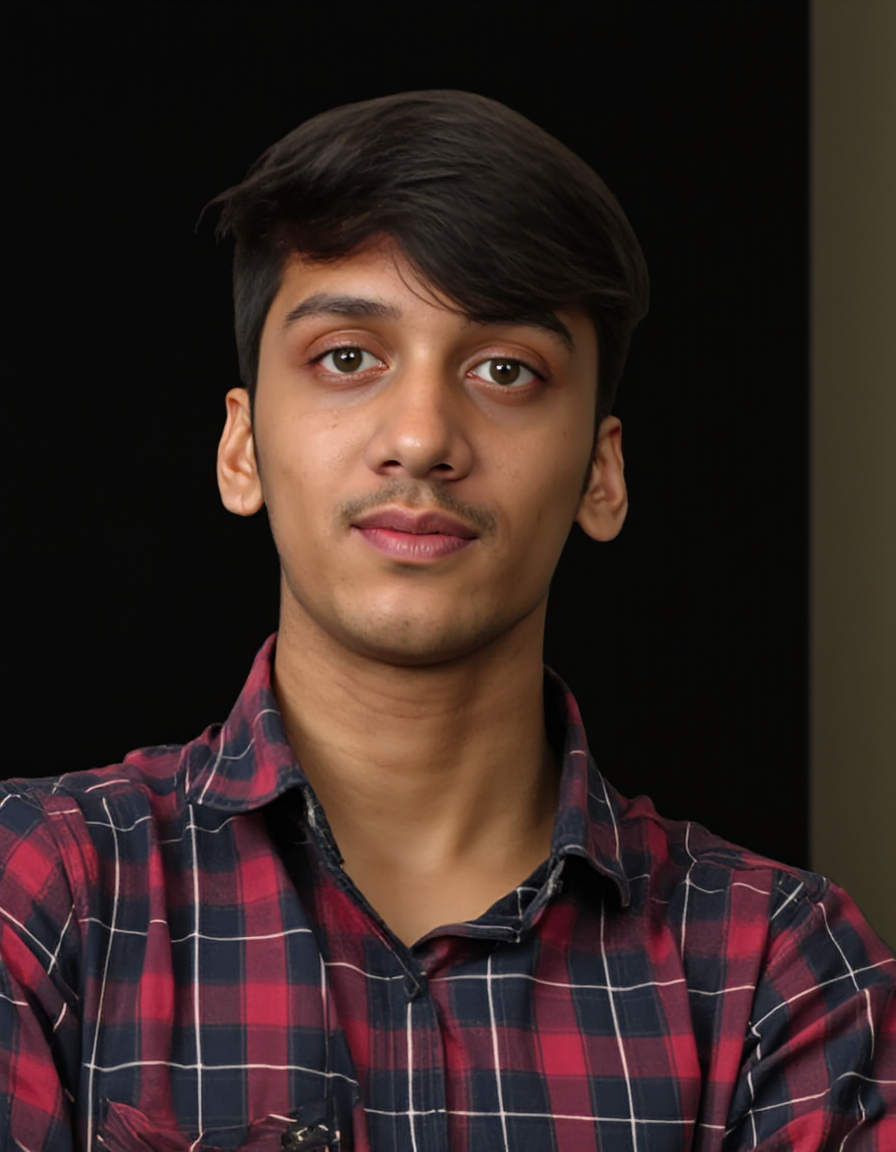

In [ ]:
import PIL.Image

img = PIL.Image.open('/content/rahul.png')
img

In [ ]:
model = genai.GenerativeModel('gemini-1.5-pro')

In [ ]:

image_path = '/content/rahul.png'
sample = PIL.Image.open(image_path)
prompt = "Caption this image."
response = model.generate_content([prompt,sample ])
print(response.text)

Here are some caption options:

**Simple & Direct:**

* Portrait against a dark background.
* Just me.
* Feeling confident.

**A Bit More Descriptive:**

* Clean-cut and ready for anything.
* Rocking the plaid.
* Simple style, strong gaze.

**Adding a Touch of Intrigue:**

* What's on my mind?  🤔
* Lost in thought.
* The future is bright.

**If you know the context:**

*  Excited for the new school year.
*  Ready to take on new challenges.
*  Feeling good about this headshot.


Choose the caption that best fits the intended tone and context of the image.

